In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [63]:
tf.random.set_seed(42)

DOMAIN: Electronics and Telecommunication

• CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals. Company wants to build a machine learning model which can help the company to predict the
equipment’s signal quality using various parameters.

• DATA DESCRIPTION: The data set contains information on various signal tests performed:
1. Parameters: Various measurable signal parameters.
2. Signal_Quality: Final signal strength or quality

• PROJECT OBJECTIVE: The need is to build a regressor which can use these parameters to determine the signal strength or
quality [as number].


In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from keras.optimizers import SGD
from ipywidgets import Button, GridBox, Layout, ButtonStyle, Text, Label, interact, interactive, fixed, interact_manual


Question 1. Import data.

In [65]:
def impute_values(df):
  print("Checking for null values....")
  if df.isnull().sum().any() == False:
    print("There are no null values")
    print("Shape of dataset - no records removed: ",df.shape)
  print("Checking for duplicate records....")
  if df[df.duplicated()==True].sum().any() == True:
    print("There are ",df[df.duplicated()==True].count(),"duplicate records - removing them....")
    df.drop_duplicates(keep='first',inplace=True)
    print("Removed the duplicate records....")
    print(df[df.duplicated()==True])
    print("Shape of dataset - after removing duplicates: ",df.shape)
  return df

def on_b1_clicked(a):
  if a==10:
      path = "/content/drive/MyDrive/Colab Notebooks/Signal.csv"
      df = pd.read_csv(path)
      print(df.sample(1))
      print("Shape of dataset: ",df.shape)
      df = impute_values(df)
      return df
  else:
    path = "".join(['/content/drive/MyDrive/Colab Notebooks/', t1.value.strip()])
    on_b1_clicked.df = pd.read_csv(path)
    print(on_b1_clicked.df.sample(1))
    print("Shape of dataset: ",on_b1_clicked.df.shape)
    df = impute_values(on_b1_clicked.df)
    t2.value = 'Done'
    return on_b1_clicked.df


Question 2. Data analysis & visualisation

• Perform relevant and detailed statistical analysis on the data.
• Perform relevant and detailed uni, bi and multi variate analysis.

Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better
analysis. Create your own features if required. Be highly experimental and analytical here to find relevant hidden patterns.

In [66]:
df = on_b1_clicked(a=10)

     Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
164          7.3         0.59  ...           9.4                5

[1 rows x 12 columns]
Shape of dataset:  (1599, 12)
Checking for null values....
There are no null values
Shape of dataset - no records removed:  (1599, 12)
Checking for duplicate records....
There are  Parameter 1        240
Parameter 2        240
Parameter 3        240
Parameter 4        240
Parameter 5        240
Parameter 6        240
Parameter 7        240
Parameter 8        240
Parameter 9        240
Parameter 10       240
Parameter 11       240
Signal_Strength    240
dtype: int64 duplicate records - removing them....
Removed the duplicate records....
Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []
Shape of dataset - after removing duplicates:  (1359, 12)


**Insight**
There are 1599 samples and 12 features.

There are no null values in all samples

There are 240 duplicate rows. After removing the duplicates now there are 1359 records.

In [67]:
df.eq(0).sum()

Parameter 1          0
Parameter 2          0
Parameter 3        118
Parameter 4          0
Parameter 5          0
Parameter 6          0
Parameter 7          0
Parameter 8          0
Parameter 9          0
Parameter 10         0
Parameter 11         0
Signal_Strength      0
dtype: int64

In [68]:
df.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [69]:
df['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

**Insight**
All the featues are float data type and target feature Signal_Stength is integer. 

For the target column, there are only very few examples for signal strngth 4 8 and 3. signal strength 7 is moderate and most of the samples are 5 and 6. data set is kind of imbalanced classes.

In [70]:
df.describe().T

count       mean        std  ...      50%       75%        max
Parameter 1      1359.0   8.310596   1.736990  ...   7.9000   9.20000   15.90000
Parameter 2      1359.0   0.529478   0.183031  ...   0.5200   0.64000    1.58000
Parameter 3      1359.0   0.272333   0.195537  ...   0.2600   0.43000    1.00000
Parameter 4      1359.0   2.523400   1.352314  ...   2.2000   2.60000   15.50000
Parameter 5      1359.0   0.088124   0.049377  ...   0.0790   0.09100    0.61100
Parameter 6      1359.0  15.893304  10.447270  ...  14.0000  21.00000   72.00000
Parameter 7      1359.0  46.825975  33.408946  ...  38.0000  63.00000  289.00000
Parameter 8      1359.0   0.996709   0.001869  ...   0.9967   0.99782    1.00369
Parameter 9      1359.0   3.309787   0.155036  ...   3.3100   3.40000    4.01000
Parameter 10     1359.0   0.658705   0.170667  ...   0.6200   0.73000    2.00000
Parameter 11     1359.0  10.432315   1.082065  ...  10.2000  11.10000   14.90000
Signal_Strength  1359.0   5.623252   0.823578  ...   6.0000   6.00000    8.00000

[12 rows x 8 columns]

**Insight**
There are no single value features to be removed. Parameter 4, 6 and 7 shows outliers. Others featues might also have outliers its can be viewed throught box plot. 

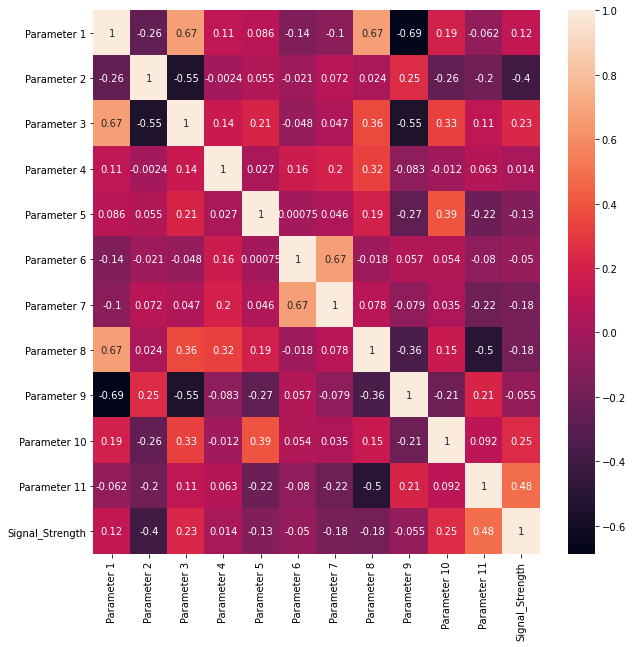

In [71]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(data=df.corr(), annot=True, ax=ax)

**Insight**
Parameter 2 and 11 has more correlation with dependent variable signal_strength. parameter 3 and 10 is next best correlation with depenent variable signal_strength.

By looking at the independent variables most of the variables like 1 2 3 8 9etc have good correlatiob with each other, whereas 4 and 5 are less correlated features.

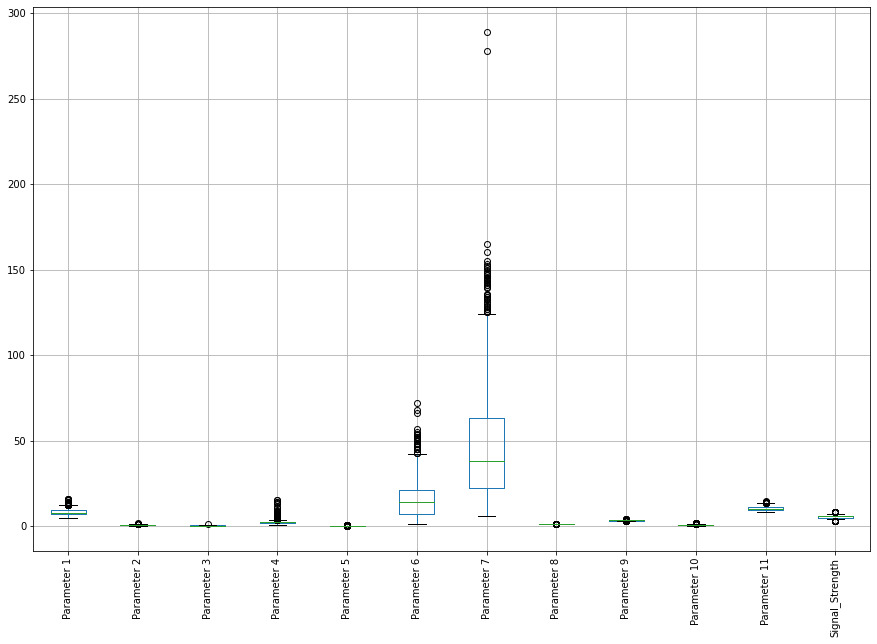

In [72]:
df.boxplot(figsize=(15,10),rot=90)

**Insight**

1.   List item
2.   List item


scale of parameter 6 and 7 are higher than others.
All the features have outliers it should be handles as we are solving regression problem.

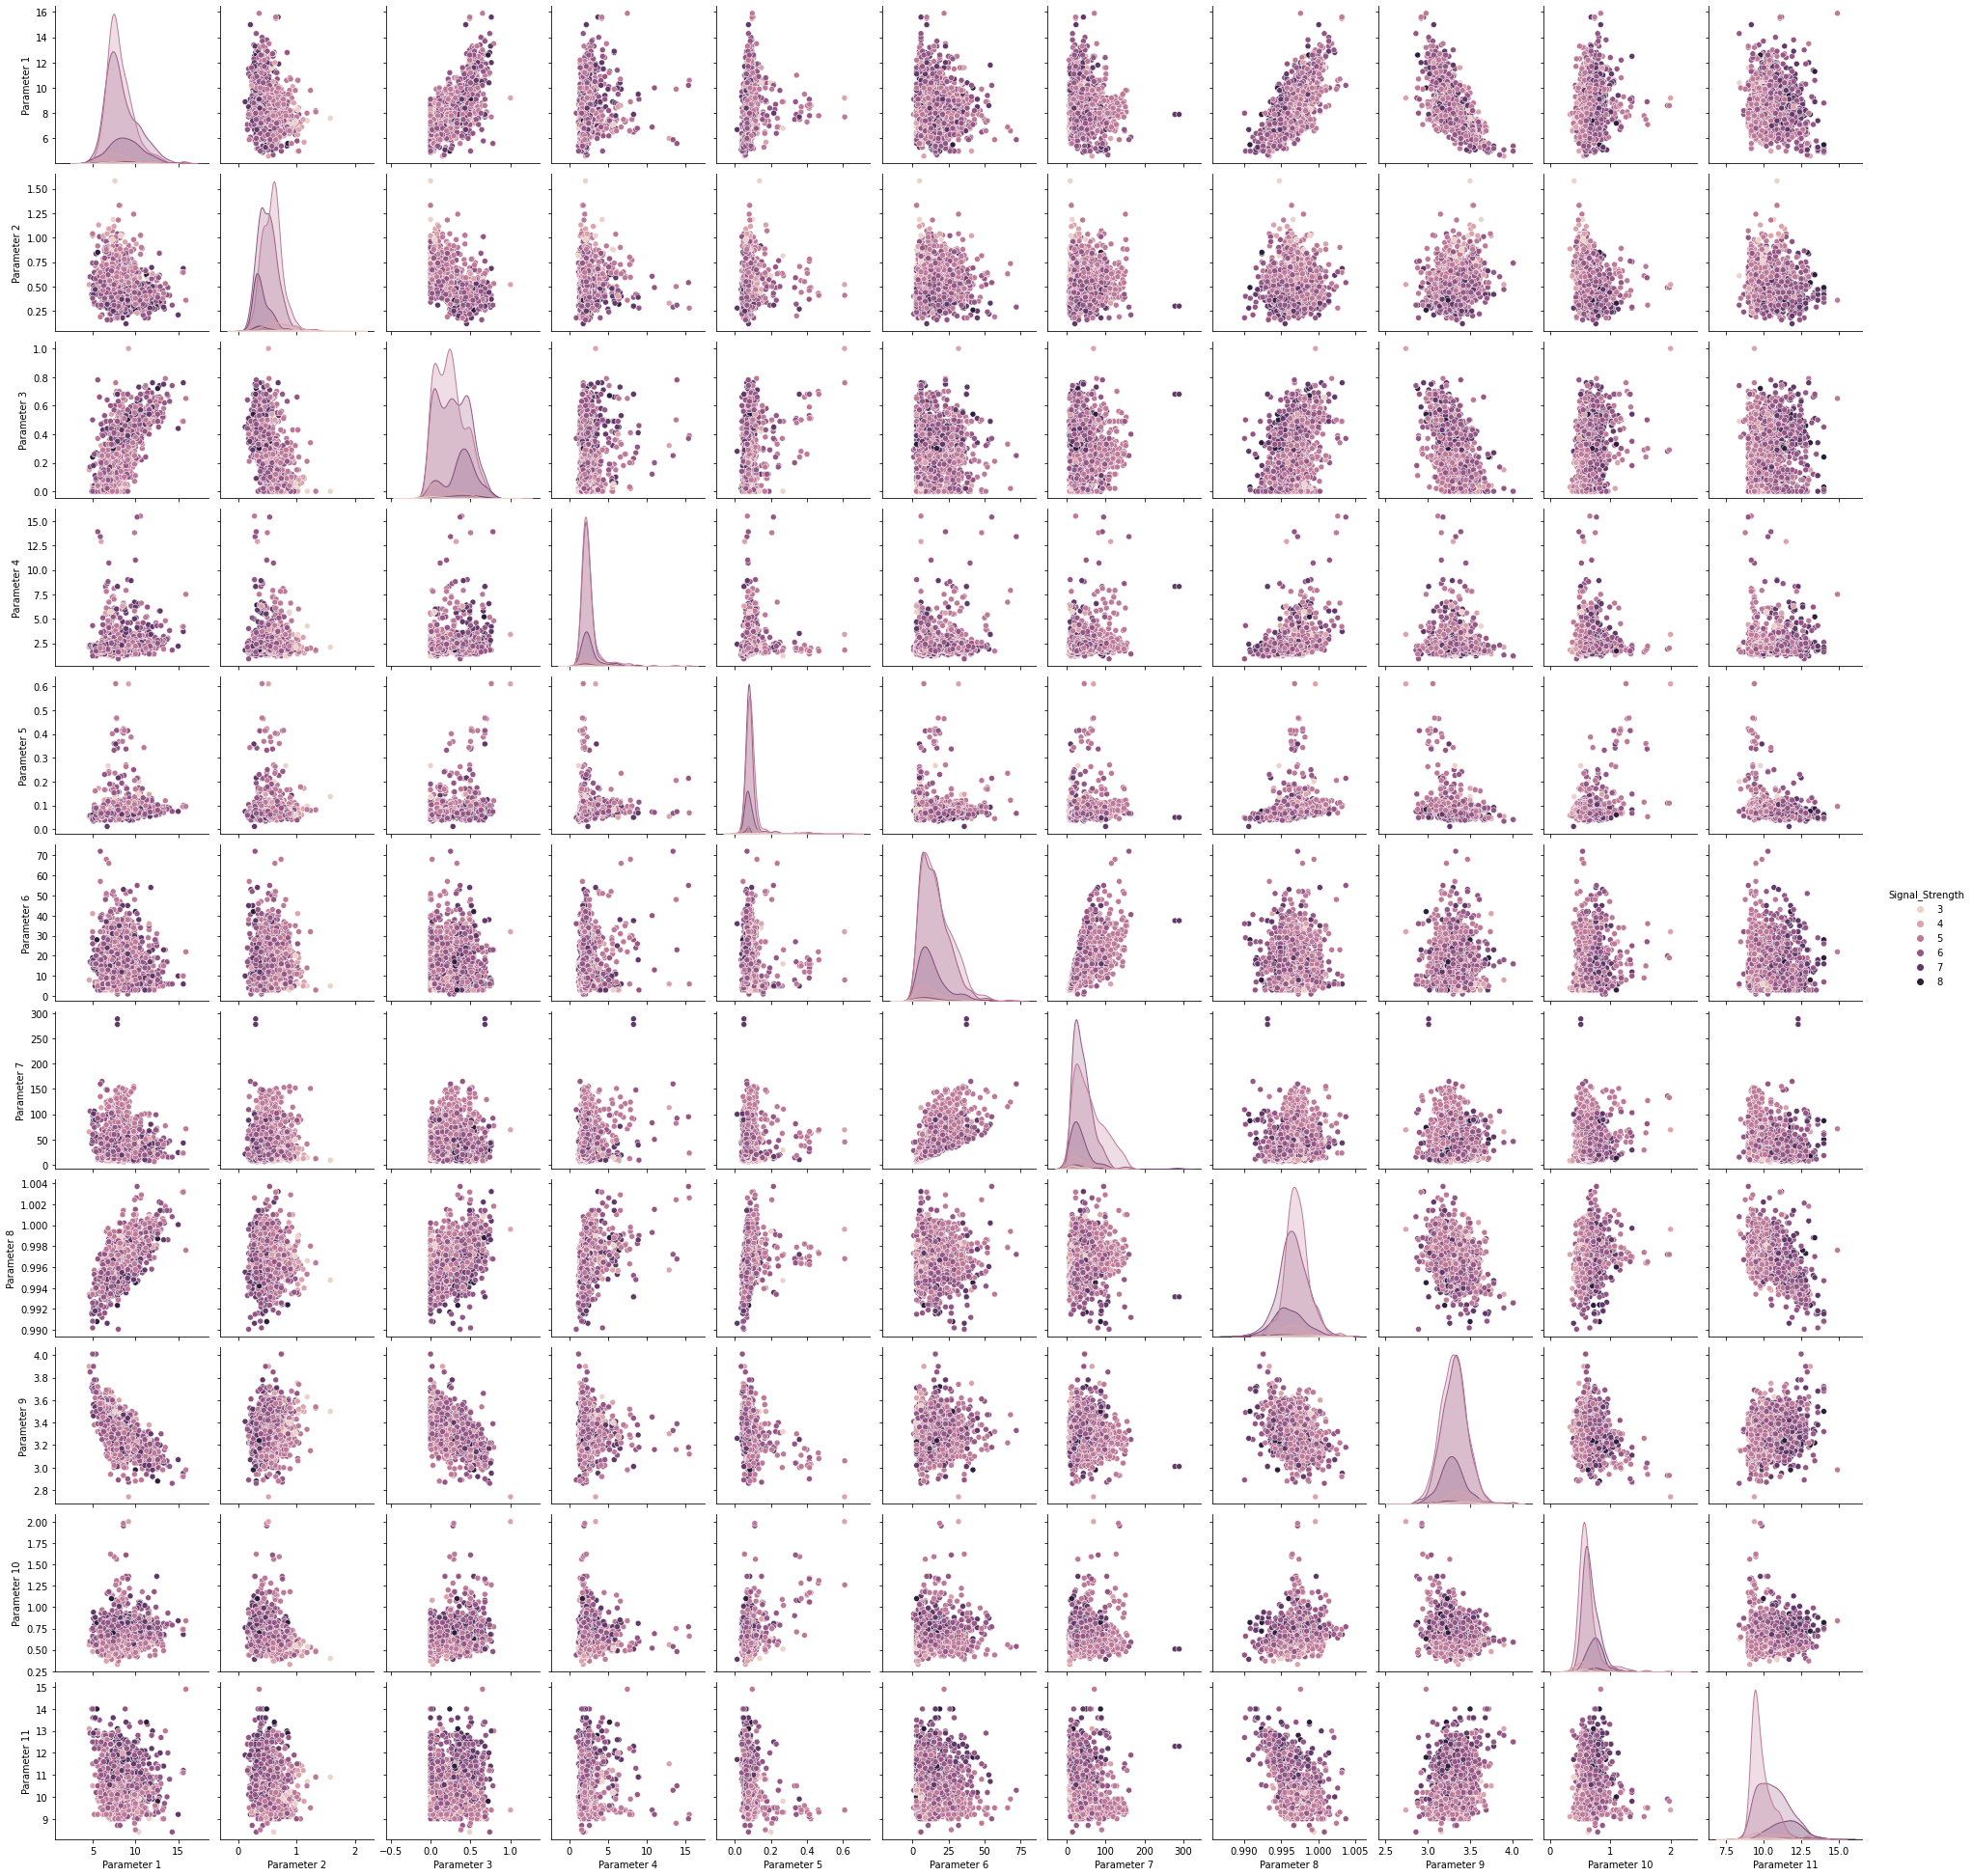

In [73]:
sns.pairplot(data=df, hue="Signal_Strength")


**Insight**
1,2,3,6,7,8,9,10,11- all these paramaters shows large of little seperation on the data for different classes.

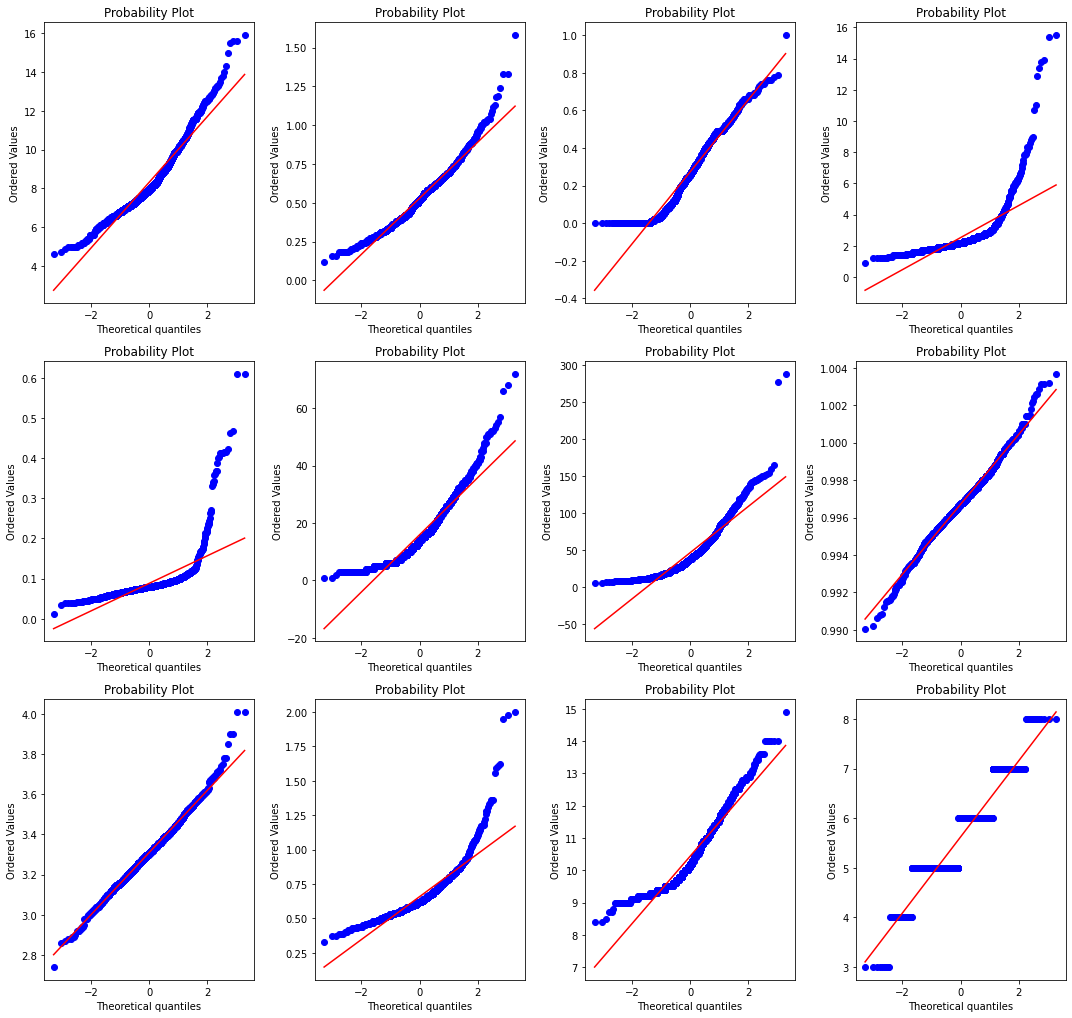

In [74]:
f, axes = plt.subplots(3, 4, figsize=(15,15))

k=0

for i in range(0,3):
  for j in range(0,4):
    stats.probplot(df[df.columns.values[k]], dist="norm", plot=axes[i,j])
    k = k + 1 
plt.tight_layout(rect=[0, 0, 1, 0.95])

**Insight**
1,2,7,8 parameters shows good normalized data wheareas other parameters are not and hence we need to normalize our data.


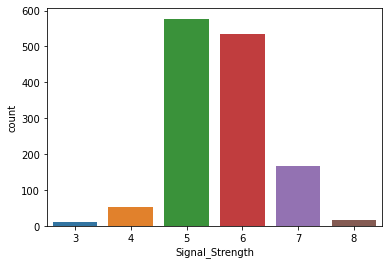

In [75]:
sns.countplot(x='Signal_Strength', data=df)


Question 3. Design, train, tune and test a neural network regressor.

Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.

In [76]:
def on_b2_clicked(a):
  print(a)
  if a==10:
    X = df.drop(labels=['Signal_Strength'],axis=1)
    y = df['Signal_Strength']
    print("Shape of X - ",X.shape," Shape if y - ",y.shape)
    return X,y
  else:
    on_b2_clicked.X = on_b1_clicked.df.drop(labels=[t3.value.strip()],axis=1)
    on_b2_clicked.y = df[t3.value.strip()]
    print("Shape of X - ",on_b2_clicked.X.shape," Shape if y - ",on_b2_clicked.y.shape)
    t4.value = 'Found'
    return on_b2_clicked.X,on_b2_clicked.y

10
Shape of X -  (1359, 11)  Shape if y -  (1359,)
Handled Outlier for  Parameter 1  and dtype is  float64
Handled Outlier for  Parameter 2  and dtype is  float64
Handled Outlier for  Parameter 3  and dtype is  float64
Handled Outlier for  Parameter 4  and dtype is  float64
Handled Outlier for  Parameter 5  and dtype is  float64
Handled Outlier for  Parameter 6  and dtype is  float64
Handled Outlier for  Parameter 7  and dtype is  float64
Handled Outlier for  Parameter 8  and dtype is  float64
Handled Outlier for  Parameter 9  and dtype is  float64
Handled Outlier for  Parameter 10  and dtype is  float64
Handled Outlier for  Parameter 11  and dtype is  float64


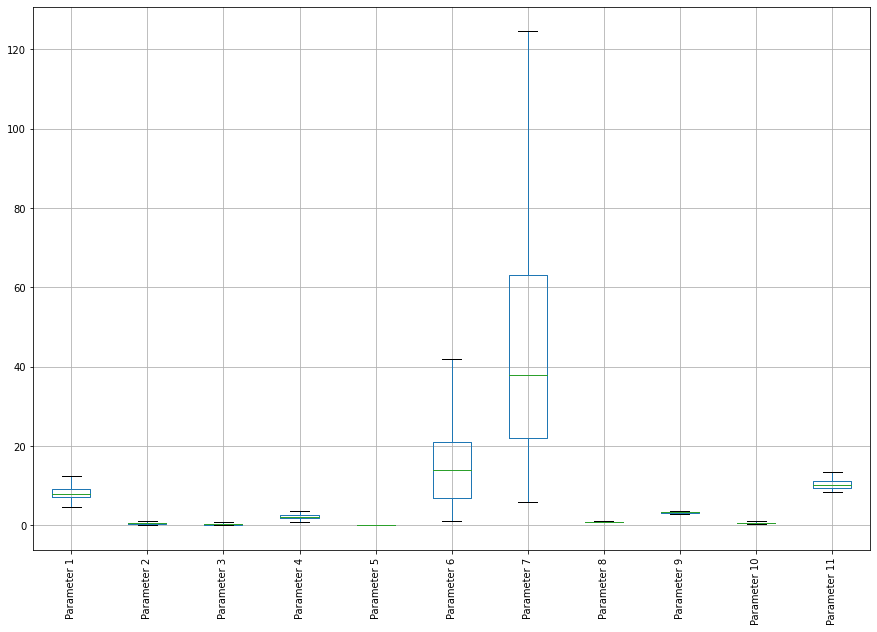

In [77]:
def out(col):
  q25, q75 = np.percentile(col, 25), np.percentile(col, 75)
  iqr = q75 - q25
    
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  upper = q75 + cut_off
  lower = q25 - cut_off
  return upper,lower

X,y =on_b2_clicked(a=10)
for x in X.columns:
  up,lw = out(X[x])
  X[x]=np.where(X[x]>up ,up, X[x])
  X[x]=np.where(X[x]<lw ,lw, X[x])
  print("Handled Outlier for ",x," and dtype is ",X[x].dtype)

X.boxplot(figsize=(15,10),rot=90)

In [78]:
def train_test(X,y):
  x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=612)
  print(x_train.shape)
  print(x_test.shape)
  return x_train, x_test, y_train, y_test

def on_b3_clicked(a):
  if a==10:
    print(X['Parameter 3'].mean())
    X.replace(0,X.median(),inplace=True)
    print(X.eq(0).sum())
    x_train, x_test, y_train, y_test = train_test(X,y)
  else:
    print(on_b2_clicked.X['Parameter 3'].mean())
    on_b2_clicked.X.replace(0,on_b2_clicked.X.median(),inplace=True)
    print(on_b2_clicked.X.eq(0).sum())
    x_train, x_test, y_train, y_test = train_test(on_b2_clicked.X,on_b2_clicked.y)
  

  #Initialize Sequential Graph (model)
  model = tf.keras.Sequential()

  #Normalize the data
  model.add(tf.keras.layers.BatchNormalization())

  #Add Dense layer for prediction - Keras declares weights and bias automatically
  model.add(tf.keras.layers.Dense(300))

  model.add(tf.keras.layers.Dense(200))

  model.add(tf.keras.layers.Dense(100))

  model.add(tf.keras.layers.Dense(50))

  model.add(tf.keras.layers.Dense(25))

  model.add(tf.keras.layers.Dense(10))

  model.add(tf.keras.layers.Dense(1, input_shape=(11,)))


  #epochs = 200
  learning_rate = 0.01
  #decay_rate = learning_rate / epochs
  #print("Learning Rate",decay_rate)
  sgd = SGD(lr=learning_rate)

  #Compile the model - add Loss and Gradient Descent optimizer
  model.compile(optimizer=sgd, loss='mse')

  model.fit(x_train, y_train,
          validation_data=(x_test, y_test), 
          epochs=300,
          batch_size=64)
  print(model.get_weights())
  print(model.summary())
  model.save('signalmodel.h5')
  if a!=10:
    on_b3_clicked.model = model
    t5.value = "Network Trained"
  return model

In [79]:
model = on_b3_clicked(a=10)

0.27228844738778446
Parameter 1     0
Parameter 2     0
Parameter 3     0
Parameter 4     0
Parameter 5     0
Parameter 6     0
Parameter 7     0
Parameter 8     0
Parameter 9     0
Parameter 10    0
Parameter 11    0
dtype: int64
(1087, 11)
(272, 11)
Epoch 1/300
17/17 [==============================] - 1s 19ms/step - loss: 9.7839 - val_loss: 12.8646
Epoch 2/300
17/17 [==============================] - 0s 8ms/step - loss: 1.1737 - val_loss: 10.7089
Epoch 3/300
17/17 [==============================] - 0s 7ms/step - loss: 0.8023 - val_loss: 4.1216
Epoch 4/300
17/17 [==============================] - 0s 7ms/step - loss: 0.5691 - val_loss: 2.5622
Epoch 5/300
17/17 [==============================] - 0s 8ms/step - loss: 0.5492 - val_loss: 5.7844
Epoch 6/300
17/17 [==============================] - 0s 7ms/step - loss: 0.7305 - val_loss: 2.0841
Epoch 7/300
17/17 [==============================] - 0s 7ms/step - loss: 0.5288 - val_loss: 0.5399
Epoch 8/300
17/17 [==============================] -

**Insight**

For regression model hyperparm used for tuning was # of layers # of neurons in layers, learning rate etc.

1 - input layer 
1 - output layer 
and 6 hidden layers

There are 11 features and hence input layer will have 11 weights and 1 bias for choosing randomly

next layer has 300 neurons and hence 300 * 11 + 300 w's and b's
next 200 * 300 + 200 w's and b's
100 * 200 + 100 w's and b's
50 * 100 + 50 w's and b's
25 * 50 + 25 w's and b's
10 * 25 + 10 w's and b's
output layer will have 10 * 1 + 1 w's and b's

total 90496 parms and 2 non-trainable parm

here there will be 11 gd eqns for weights and 1 gd eqn for bias

the loss is getting reduced on adding the layers better tuning and adding relevent activation function to the hidden layers may further reduce loss

**Insight**
Before model building handled the ouliers as shown above and imputed 0's with median values.

Question 4. Pickle the model for future use

In [80]:
def on_b4_clicked(self):
  on_b3_clicked.model.save('signalmodel.h5')
  t6.value = "Saved model to disk"

In [81]:
ls -l

total 420
drwx------ 5 root root   4096 Apr  4 16:00 drive/
drwxr-xr-x 1 root root   4096 Mar 25 13:38 sample_data/
-rw-r--r-- 1 root root  17664 Apr  4 16:04 signalmodel1.h5
-rw-r--r-- 1 root root 398824 Apr  4 16:23 signalmodel.h5


Question 1. Import data

In [82]:
df1 = on_b1_clicked(a=10)

      Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
1230          7.7         0.18  ...          11.8                6

[1 rows x 12 columns]
Shape of dataset:  (1599, 12)
Checking for null values....
There are no null values
Shape of dataset - no records removed:  (1599, 12)
Checking for duplicate records....
There are  Parameter 1        240
Parameter 2        240
Parameter 3        240
Parameter 4        240
Parameter 5        240
Parameter 6        240
Parameter 7        240
Parameter 8        240
Parameter 9        240
Parameter 10       240
Parameter 11       240
Signal_Strength    240
dtype: int64 duplicate records - removing them....
Removed the duplicate records....
Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []
Shape of dataset - after removing duplicates:  (1359, 12)


Question 2. Data analysis & visualisation
• Perform relevant and detailed statistical analysis on the data.
• Perform relevant and detailed uni, bi and multi variate analysis.
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better
analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.

In [83]:
df1.eq(0).sum()

Parameter 1          0
Parameter 2          0
Parameter 3        118
Parameter 4          0
Parameter 5          0
Parameter 6          0
Parameter 7          0
Parameter 8          0
Parameter 9          0
Parameter 10         0
Parameter 11         0
Signal_Strength      0
dtype: int64

In [84]:
df1.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

**Insight**
There are 1599 samples and 12 features.

There are no null values in all samples

There are 240 duplicate rows. After removing the duplicates now there are 1359 records.

All the featues are float data type and target feature Signal_Stength is integer.

For the target column, there are only very few examples for signal strngth 4 8 and 3. signal strength 7 is moderate and most of the samples are 5 and 6. data set is kind of imbalanced classes.

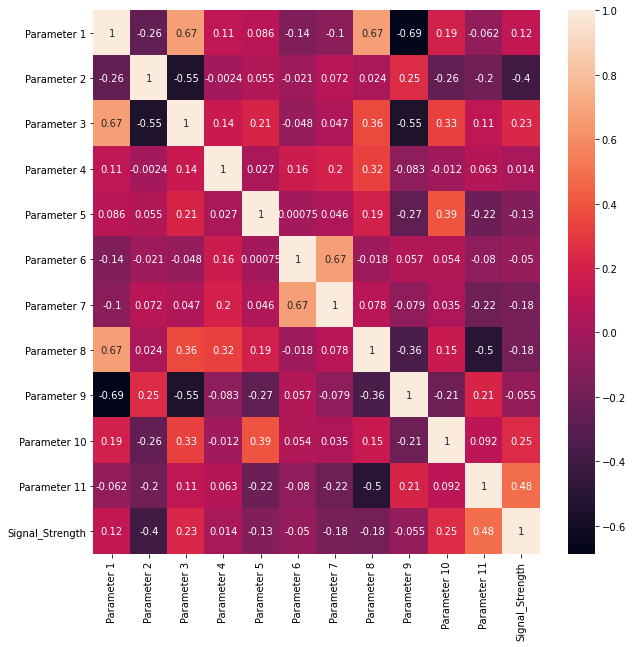

In [85]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(data=df1.corr(), annot=True, ax=ax)

**Insight**
Parameter 2 and 11 has more correlation with dependent variable signal_strength. parameter 3 and 10 is next best correlation with depenent variable signal_strength.

By looking at the independent variables most of the variables like 1 2 3 8 9etc have good correlatiob with each other, whereas 4 and 5 are less correlated features.

In [86]:
df1.describe().T

count       mean        std  ...      50%       75%        max
Parameter 1      1359.0   8.310596   1.736990  ...   7.9000   9.20000   15.90000
Parameter 2      1359.0   0.529478   0.183031  ...   0.5200   0.64000    1.58000
Parameter 3      1359.0   0.272333   0.195537  ...   0.2600   0.43000    1.00000
Parameter 4      1359.0   2.523400   1.352314  ...   2.2000   2.60000   15.50000
Parameter 5      1359.0   0.088124   0.049377  ...   0.0790   0.09100    0.61100
Parameter 6      1359.0  15.893304  10.447270  ...  14.0000  21.00000   72.00000
Parameter 7      1359.0  46.825975  33.408946  ...  38.0000  63.00000  289.00000
Parameter 8      1359.0   0.996709   0.001869  ...   0.9967   0.99782    1.00369
Parameter 9      1359.0   3.309787   0.155036  ...   3.3100   3.40000    4.01000
Parameter 10     1359.0   0.658705   0.170667  ...   0.6200   0.73000    2.00000
Parameter 11     1359.0  10.432315   1.082065  ...  10.2000  11.10000   14.90000
Signal_Strength  1359.0   5.623252   0.823578  ...   6.0000   6.00000    8.00000

[12 rows x 8 columns]

**Insight**
There are no single value features to be removed. Parameter 4, 6 and 7 shows outliers. Others featues might also have outliers its can be viewed throught box plot. 

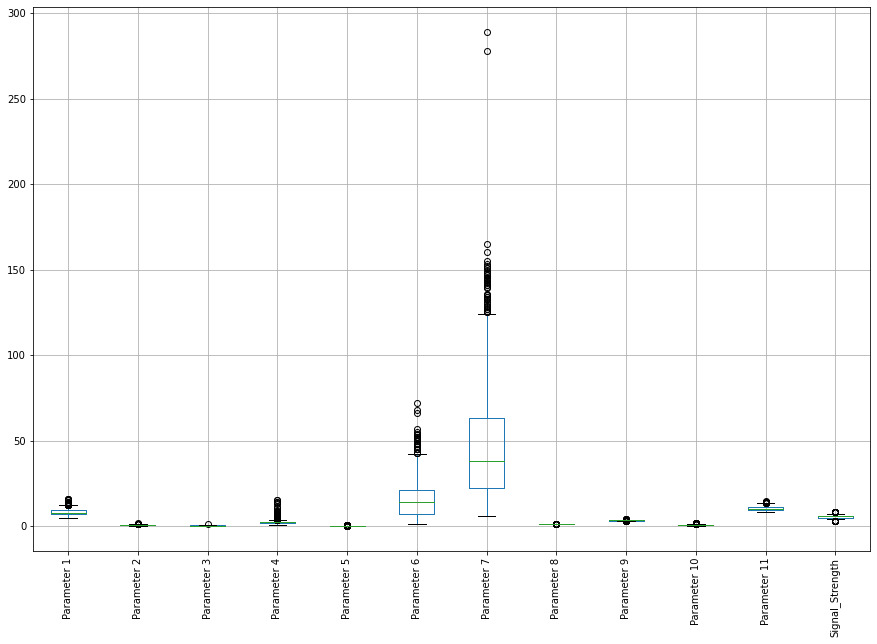

In [87]:
df1.boxplot(figsize=(15,10),rot=90)

**Insight**
scale of parameter 6 and 7 are higher than others.
All the features have outliers it should be handled.

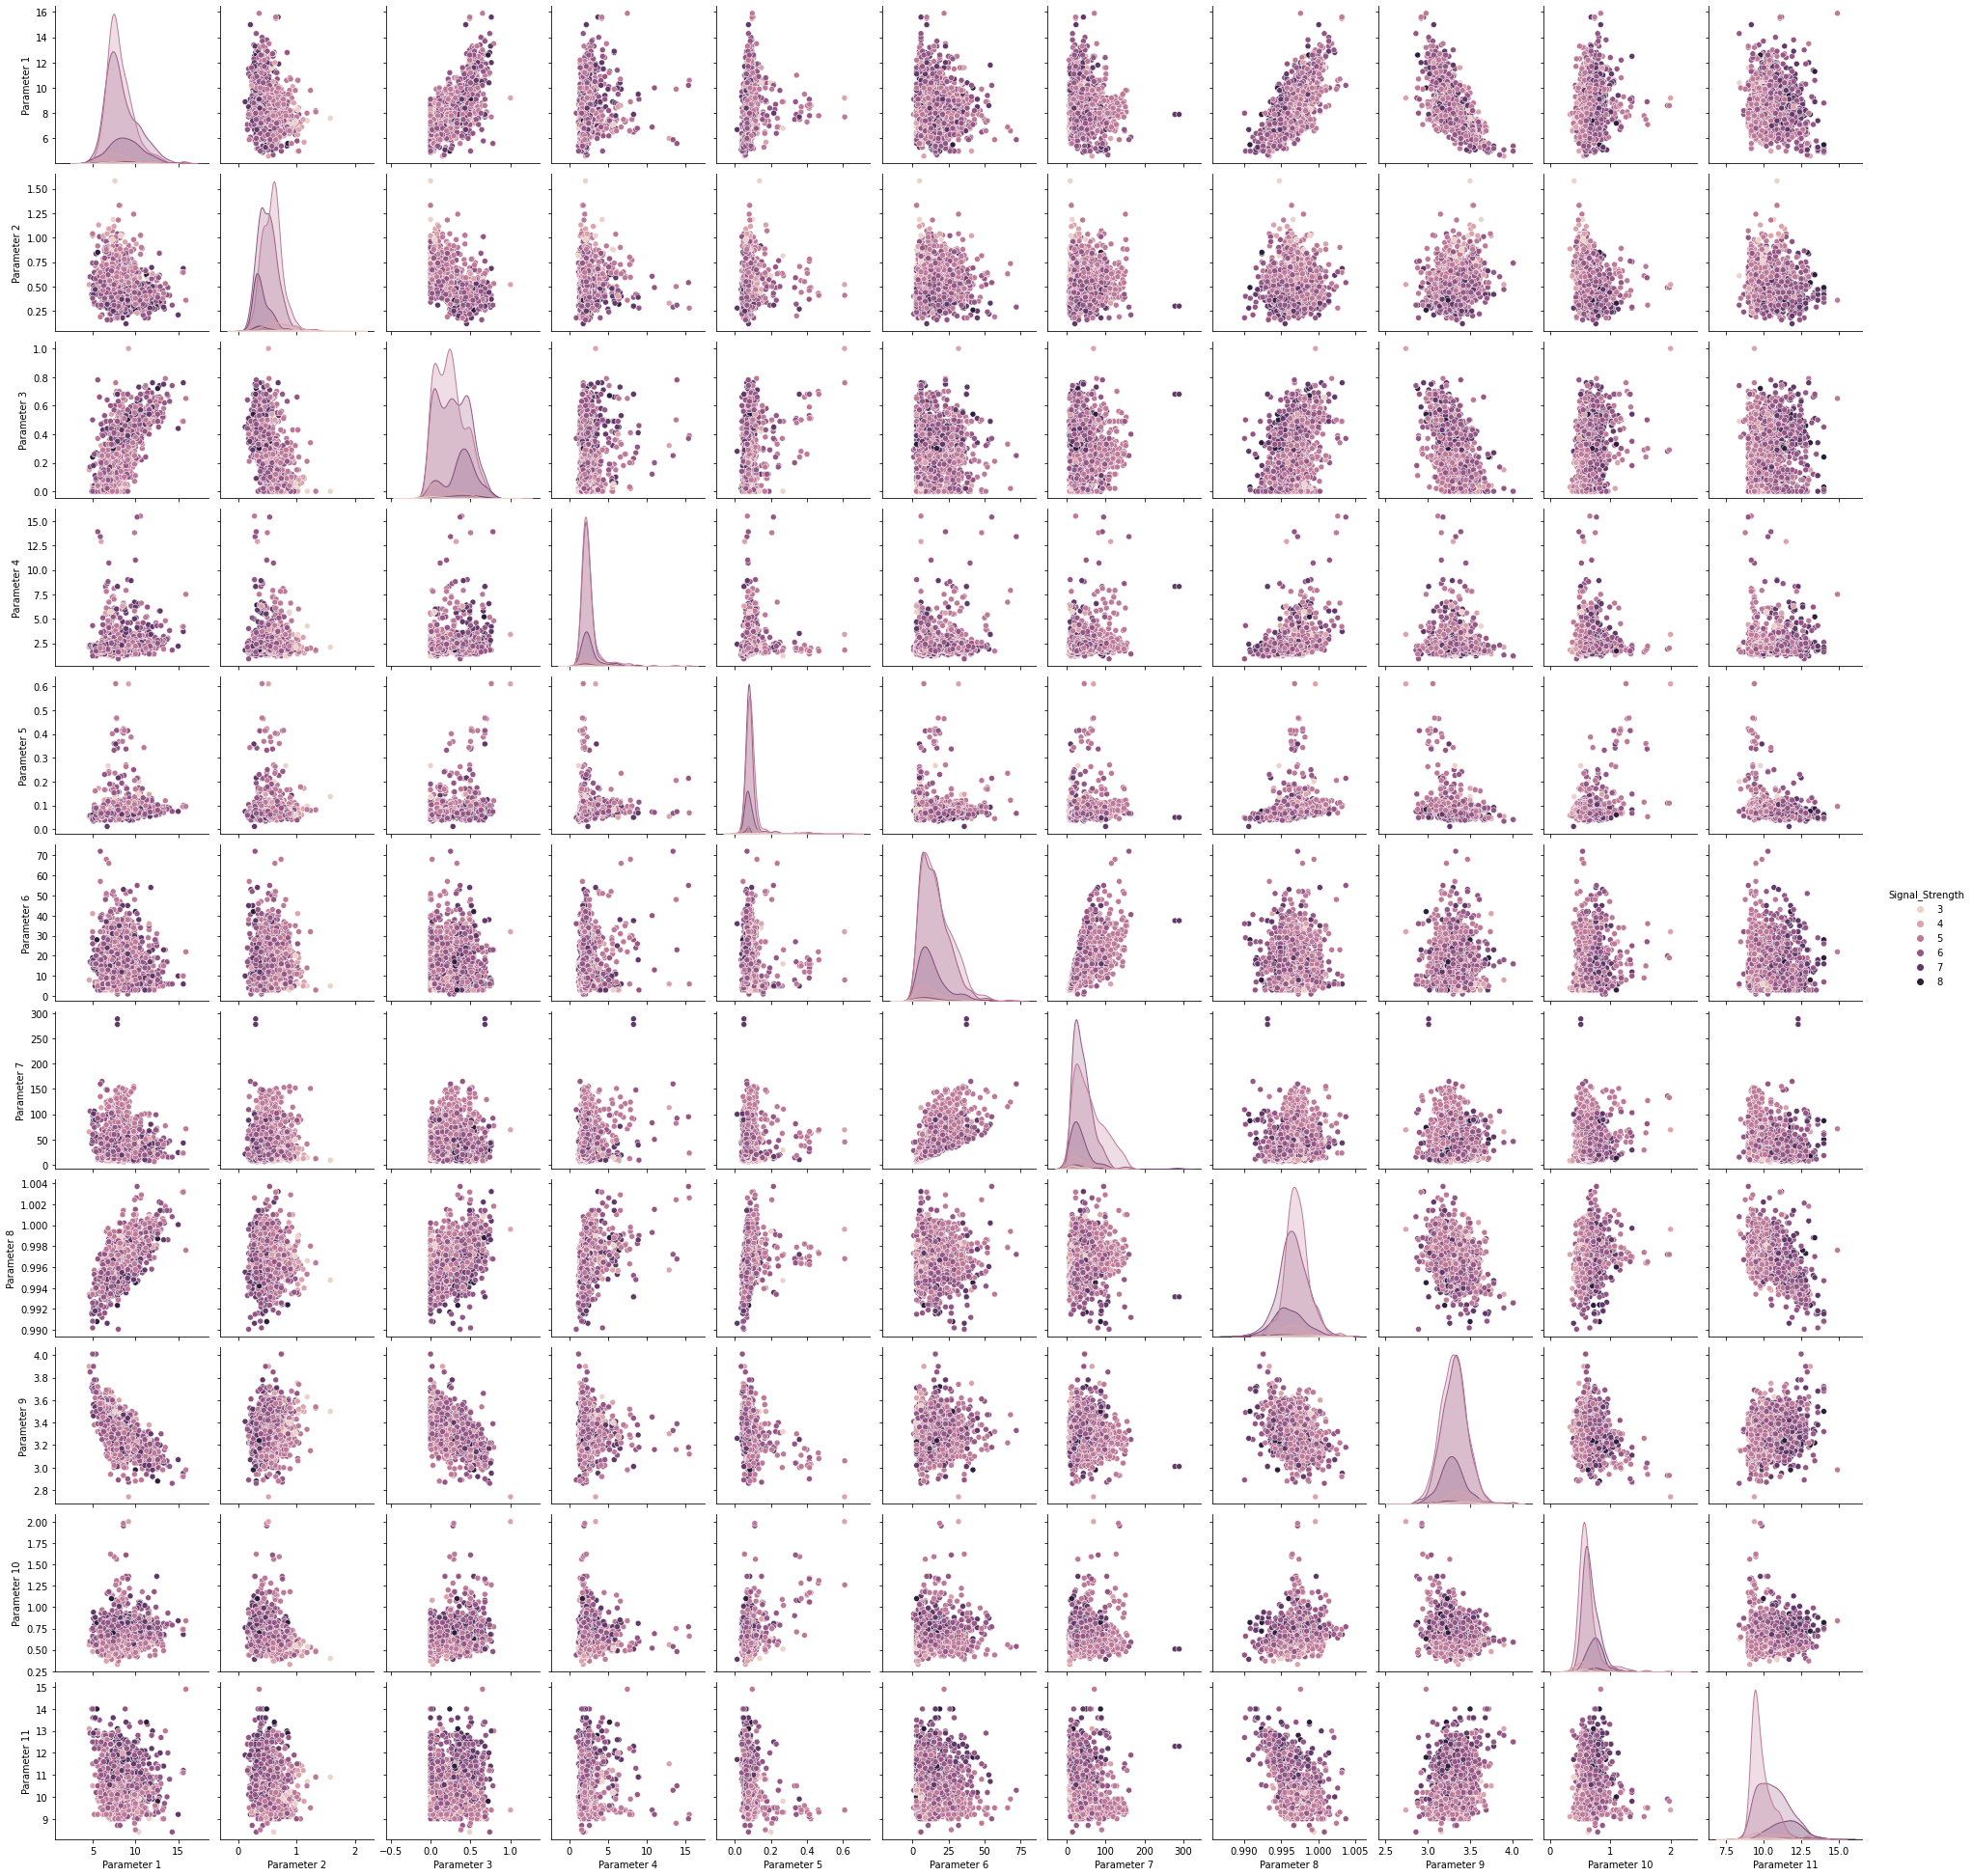

In [88]:
sns.pairplot(data=df1, hue="Signal_Strength")

**Insight**
1,2,3,6,7,8,9,10,11- all these paramaters shows large of little seperation on the data for different classes.

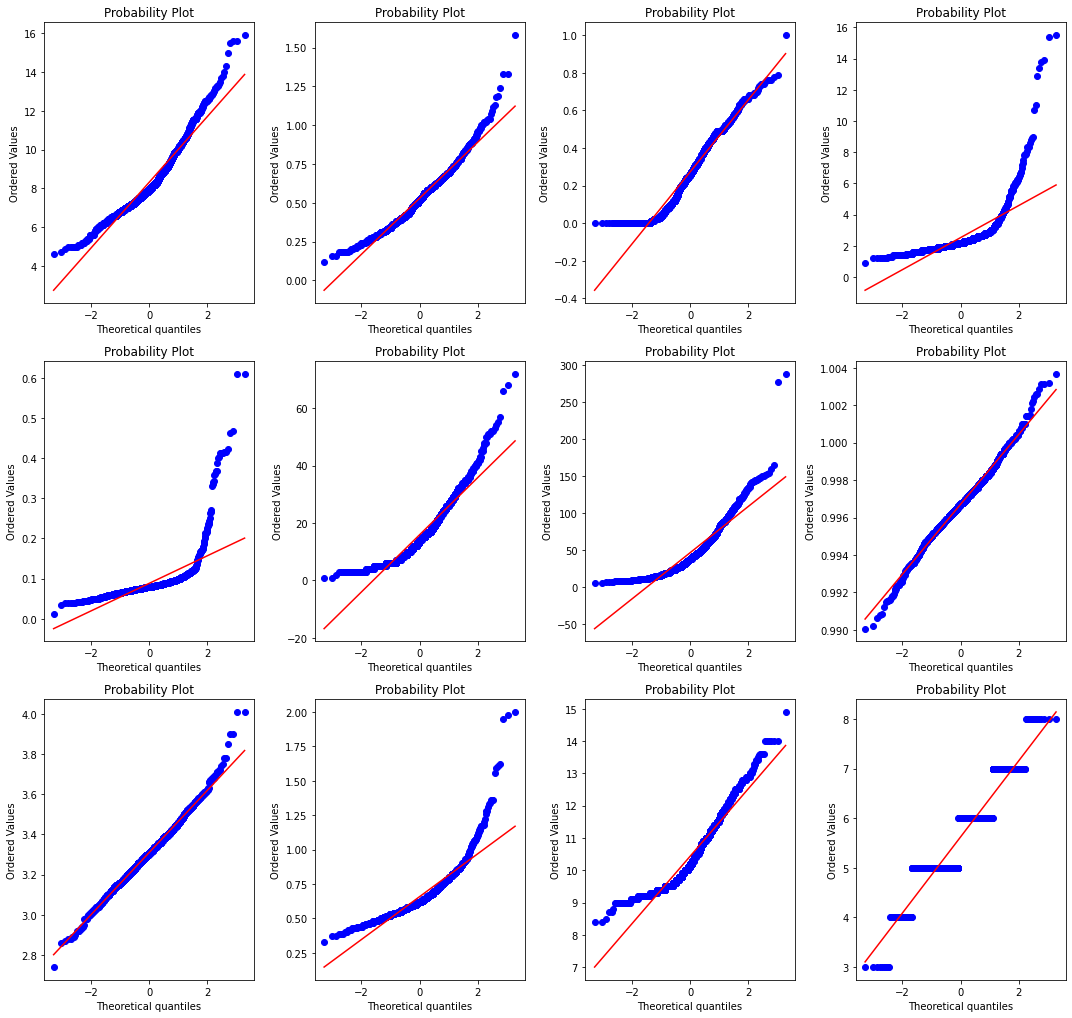

In [89]:
f, axes = plt.subplots(3, 4, figsize=(15,15))

k=0

for i in range(0,3):
  for j in range(0,4):
    stats.probplot(df1[df1.columns.values[k]], dist="norm", plot=axes[i,j])
    k = k + 1 
plt.tight_layout(rect=[0, 0, 1, 0.95])

**Insight**
1,2,7,8 parameters shows good normalized data wheareas other parameters are not and hence we need to normalize our data.


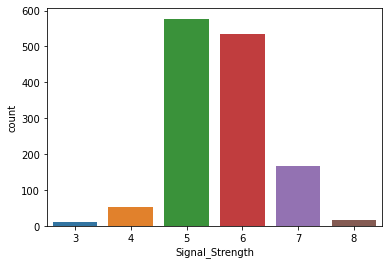

In [90]:
sns.countplot(x='Signal_Strength', data=df1)


Question 3. Design, train, tune and test a neural network classifier..
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here.

In [91]:
X1 = df1.drop(labels=['Signal_Strength'],axis=1)
y1 = df1['Signal_Strength']
print("Shape of X - ",X1.shape," Shape if y - ",y1.shape)  

Shape of X -  (1359, 11)  Shape if y -  (1359,)


Handled Outlier for  Parameter 1  and dtype is  float64
Handled Outlier for  Parameter 2  and dtype is  float64
Handled Outlier for  Parameter 3  and dtype is  float64
Handled Outlier for  Parameter 4  and dtype is  float64
Handled Outlier for  Parameter 5  and dtype is  float64
Handled Outlier for  Parameter 6  and dtype is  float64
Handled Outlier for  Parameter 7  and dtype is  float64
Handled Outlier for  Parameter 8  and dtype is  float64
Handled Outlier for  Parameter 9  and dtype is  float64
Handled Outlier for  Parameter 10  and dtype is  float64
Handled Outlier for  Parameter 11  and dtype is  float64


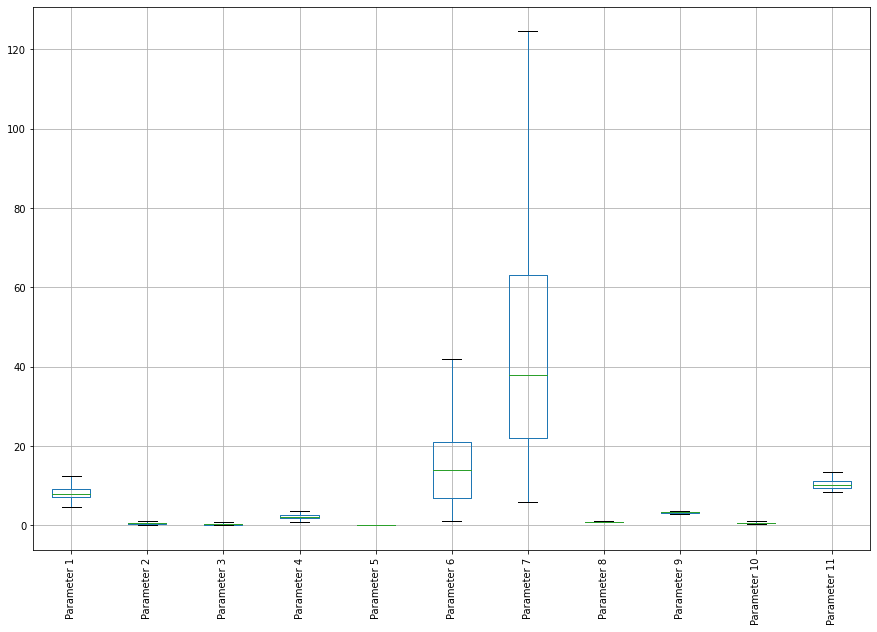

In [92]:
def out(col):
  q25, q75 = np.percentile(col, 25), np.percentile(col, 75)
  iqr = q75 - q25
    
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  upper = q75 + cut_off
  lower = q25 - cut_off
  return upper,lower

for x in X.columns:
  up,lw = out(X1[x])
  X1[x]=np.where(X1[x]>up ,up, X1[x])
  X1[x]=np.where(X1[x]<lw ,lw, X1[x])
  print("Handled Outlier for ",x," and dtype is ",X1[x].dtype)

X1.boxplot(figsize=(15,10),rot=90)

In [93]:
#l = np.sort(y.unique()).tolist()
#print(l)
#for x in range(0,len(l)):
#  print(x,l[x])
#  y.replace(l[x],x,inplace=True)
#np.sort(y.unique())

In [94]:
#y = int(y)

In [95]:
#x1_train, x1_test, y1_train, y1_test = train_test(X1,y1)

#print('First 2 examples are: ', y1_train[0:2])
#print(y1_train.value_counts())
#print(y1_test.value_counts())

In [96]:
#ohe_y_train = tf.keras.utils.to_categorical(y1_train,num_classes=9)
#ohe_y_test = tf.keras.utils.to_categorical(y1_test,num_classes=9)

In [97]:
#print('First 2 examples are: ', ohe_y_train[0:2])

In [98]:
def train_test(X,y):
  x_train, x_test, y_train, y_test = train_test_split(X1,y1,test_size=0.20,random_state=612)
  print(x_train.shape)
  print(x_test.shape)
  ohe_y_train = tf.keras.utils.to_categorical(y_train,num_classes=9)
  ohe_y_test = tf.keras.utils.to_categorical(y_test,num_classes=9)
  print('First 2 of y train examples are: ', ohe_y_train[0:2])
  print('First 2 of y test examples are: ', ohe_y_test[0:2])
  return x_train, x_test, ohe_y_train, ohe_y_test


def traintestforclassification(a):
  if a==10:
    print(X['Parameter 3'].mean())
    X.replace(0,X.median(),inplace=True)
    print(X.eq(0).sum())
    x_train, x_test, y_train, y_test = train_test(X1,y1)
  else:
    print(on_b2_clicked.X['Parameter 3'].mean())
    on_b2_clicked.X.replace(0,on_b2_clicked.X.median(),inplace=True)
    print(on_b2_clicked.X.eq(0).sum())
    x_train, x_test, y_train, y_test = train_test(on_b2_clicked.X,on_b2_clicked.y)
  return x_train, x_test, y_train, y_test
  

def on_b5_clicked(a):

  x1_train, x1_test, y1_train, y1_test = traintestforclassification(a=10)
  print('First 2 of y train examples are: ', y1_train[0:2])
  print('First 2 of y test examples are: ', y1_test[0:2])
  #Initialize Sequential model
  model = tf.keras.models.Sequential()

  #Normalize the data
  model.add(tf.keras.layers.BatchNormalization())

  #model.add(tf.keras.layers.Dense(144,activation='sigmoid'))
  #model.add(tf.keras.layers.Dense(72,activation='sigmoid'))
  #model.add(tf.keras.layers.Dense(36,activation='sigmoid'))
  #model.add(tf.keras.layers.Dense(18,activation='sigmoid'))

  epochs=400
  learning_rate = 0.1
  decay_rate = learning_rate / epochs
  #print("Learning Rate",decay_rate)
  sgd = SGD(lr=learning_rate)#,decay=0.01)

  #Add Dense Layer which provides 9 Outputs after applying softmax
  model.add(tf.keras.layers.Dense(9, activation='softmax'))


  #Comile the model
  model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

  model.fit(x1_train, y1_train,
          validation_data=(x1_test, y1_test), 
          epochs=400,
          batch_size=64)
  model.get_weights()
  model.summary()
  model.save('signalmodel1.h5')
  if a!=10:
    on_b5_clicked.model = model
    t7.value = "Network Trained"
  return model

In [99]:
model = on_b5_clicked(a=10)

0.2948638704930082
Parameter 1     0
Parameter 2     0
Parameter 3     0
Parameter 4     0
Parameter 5     0
Parameter 6     0
Parameter 7     0
Parameter 8     0
Parameter 9     0
Parameter 10    0
Parameter 11    0
dtype: int64
(1087, 11)
(272, 11)
First 2 of y train examples are:  [[0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]
First 2 of y test examples are:  [[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]
First 2 of y train examples are:  [[0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]
First 2 of y test examples are:  [[0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Epoch 1/400
17/17 [==============================] - 1s 18ms/step - loss: 2.3064 - accuracy: 0.1604 - val_loss: 7.5024 - val_accuracy: 0.0000e+00
Epoch 2/400
17/17 [==============================] - 0s 5ms/step - loss: 1.5469 - accuracy: 0.4233 - val_loss: 5.6122 - val_accuracy: 0.0368
Epoch 3/400
17/17 [==============================] - 0s 5ms/step - loss: 1.2143 - ac

**Insight**

classes are 3 4 5 6 7 8 
but one hot encoded to 9 digits (8+1), hence 0 to 8 outputs 

hyperparm like softmax activation function learning rate is uses.

adding more layers gives poor accuracy.
poor accuracy is also because of imbalanced data set.

tuning the hyperparm didnt give better results, the accuracy is better without hidden layers.

more samples needed to be added for proper balanced class dataset

here the output layer has 9 outputs. there are 11 feature so 11 * 9 + 9 w's and b's hence the value 108

further tuning and balanced data set will improve the accuracy.

Question 4. Pickle the model for future use.

In [100]:
def on_b6_clicked(self):
  on_b5_clicked.model.save('signalmodel.h5')
  t8.value = "Saved model to disk"

Part 3 : Develop a clickable GUI [desk application or web service application] which can automate Part I & II of this
project. 

In [101]:
#def b1_clicked(t2):
  #on_b1_clicked()

l1  = Label(value='File Name',
           layout=Layout(width='auto', grid_area='l1'))
l2  = Label(value='Target Column',
           layout=Layout(width='auto', grid_area='l2'))
l3  = Label(value='NN Regresssor',
           layout=Layout(width='auto', grid_area='l3'))
l4  = Label(value='Pickle',
           layout=Layout(width='auto', grid_area='l4'))
l5  = Label(value='NN Classifier',
           layout=Layout(width='auto', grid_area='l5'))
l6  = Label(value='Pickle',
           layout=Layout(width='auto', grid_area='l6'))

t1  = Text(value=' ',
           layout=Layout(width='auto', grid_area='t1'))
t2  = Text(value=' ',
           layout=Layout(width='auto', grid_area='t2'))
t3  = Text(value=' ',
           layout=Layout(width='auto', grid_area='t3'))
t4  = Text(value=' ',
           layout=Layout(width='auto', grid_area='t4'))
t5  = Text(value=' ',
           layout=Layout(width='auto', grid_area='t5'))
t6  = Text(value=' ',
           layout=Layout(width='auto', grid_area='t6'))
t7  = Text(value=' ',
           layout=Layout(width='auto', grid_area='t7'))
t8  = Text(value=' ',
           layout=Layout(width='auto', grid_area='t8'))


b1  = Button(description='import data',
                 layout=Layout(width='auto', grid_area='b1'))
b2  = Button(description='import target',
               layout=Layout(width='auto', grid_area='b2'))
b3  = Button(description='train',
               layout=Layout(width='auto', grid_area='b3'))
b4  = Button(description='run',
                 layout=Layout(width='auto', grid_area='b4'))
b5  = Button(description='train',
                 layout=Layout(width='auto', grid_area='b5'))
b6  = Button(description='run',
                 layout=Layout(width='auto', grid_area='b6'))

b1.on_click(on_b1_clicked)
b2.on_click(on_b2_clicked)
b3.on_click(on_b3_clicked)
b4.on_click(on_b4_clicked)
b5.on_click(on_b5_clicked)
b6.on_click(on_b6_clicked)

GridBox(children=[t1, b1, t2, t3, b2, t4, b3, t5, b4, t6, b5, t7, b6, t8, l1, l2, l3, l4, l5, l6],
        layout=Layout(
            width='50%',
            grid_template_rows='auto auto auto auto auto auto',
            grid_template_columns='25% 25% 25% 25%',
            grid_template_areas='''
            "l1 t1 b1 t2"
            "l2 t3 b2 t4"
            "l3 b3 t5 ."
            "l4 b4 t6 ."
            "l5 b5 t7 ."
            "l6 b6 t8 ."

            ''')
       )



GridBox(children=(Text(value=' ', layout=Layout(grid_area='t1', width='auto')), Button(description='import dat…

      Parameter 1  Parameter 2  ...  Parameter 11  Signal_Strength
1360          9.2         0.54  ...          10.9                5

[1 rows x 12 columns]
Shape of dataset:  (1599, 12)
Checking for null values....
There are no null values
Shape of dataset - no records removed:  (1599, 12)
Checking for duplicate records....
There are  Parameter 1        240
Parameter 2        240
Parameter 3        240
Parameter 4        240
Parameter 5        240
Parameter 6        240
Parameter 7        240
Parameter 8        240
Parameter 9        240
Parameter 10       240
Parameter 11       240
Signal_Strength    240
dtype: int64 duplicate records - removing them....
Removed the duplicate records....
Empty DataFrame
Columns: [Parameter 1, Parameter 2, Parameter 3, Parameter 4, Parameter 5, Parameter 6, Parameter 7, Parameter 8, Parameter 9, Parameter 10, Parameter 11, Signal_Strength]
Index: []
Shape of dataset - after removing duplicates:  (1359, 12)
Button(description='import target', layout=La

In [102]:
ls -l

total 420
drwx------ 5 root root   4096 Apr  4 16:00 drive/
drwxr-xr-x 1 root root   4096 Mar 25 13:38 sample_data/
-rw-r--r-- 1 root root  17672 Apr  4 16:25 signalmodel1.h5
-rw-r--r-- 1 root root 398824 Apr  4 16:23 signalmodel.h5


Both the models are trained and saved.

Step 1 : Enter signal.csv and press import data button --> data will be imported and once done, done message will populated in next text box

step 2 : enter target column Signal_Strength, it will be fetched from data set and once done, found message will populate in next text box.

step 3 : press tain (regressor) button, model will be trained. on completion network trained message will pop on nearby text box

step 4: press run button, model will be pickled

step 5 : press tain (classifier) button, model will be trained. on completion network trained message will pop on nearby text box

step 6: press run button, model will be pickled
